# COMP257 Week 6 Linear Regression
 
Linear Regression is a method which is used to predict the outcome of a variable, the output, or dependent variable, by using a set of independent variables. As the name implies, the method of prediction is linear, with a linear relation of the independent variables being used to predict the value of the outcome variable.

Linear regression assumes that the input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity). It also assumes that the variables they are normally distributed have a normal distribution. If they are not then you need to normalize your vairables first and check for missing values as part of data preparation.

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is: 

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!
In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.<br>

The goal this week is to another part of the modelling landscape which can be used : linear regression models.  Machine learning algorithms are stochastic (i.e they are aiming to guess values based on rules) by design.
There are three different learning styles in machine learning algorithms:

In this notebook we will see how simple regression analysis can help to understand the data quality and to predict data values.

Practical case 1: Sea Ice Extent and Climate Change 
Dataset : SeaIce.txt


In [1]:
student_name = "Steven GokQiu Yuan"
student_id = "44066139"

In [2]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

We can create a linear model to explain the data.

In [3]:
# Load the data and show the info and contents:
ice = pd.read_csv('files/SeaIce.txt', delim_whitespace = True) 
ice.head()

year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92

Summarize the Dataset

    Dimensions of the dataset
    Peek at the data itself
    Statistical summary of all attributes.
    Compute the mean 

In [4]:
print ('shape:', ice.shape)
ice.head()

shape: (424, 6)


year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92

In [5]:
ice.describe()
print ('mean:', ice.mean())

mean: year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64


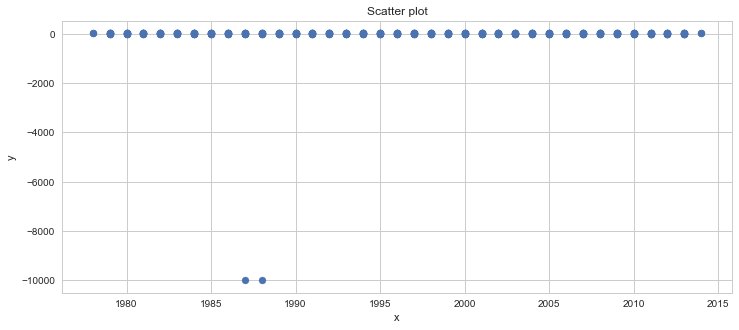

In [6]:
# Visualize the data with a scatter plot (x is year, y as extent)
# insert code here

# Create data
#ice2=ice[ice.data_type!='-9999']
x = ice.year
y = ice.extent

# Plot
plt.scatter(x, y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Clean your data  
Note what is wrong with the data and what needs to be cleaned before proceeding.

Checkpoint 1. Exclude the outlier data into a new array (ice2) and repeat the plot to check the outlier data is now exluded 

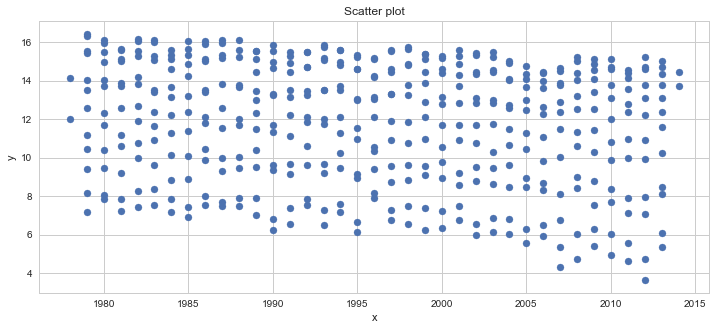

(422, 6)

In [7]:
# Remove the outlier data and and repeat the plot to confirm data is clean
# insert code here

ice2 = ice[ice. data_type != '-9999']
x = ice2.year
y = ice2.extent

# Plot
plt.scatter(x, y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
 
ice2.shape

# Normalize the Data

The lmplot() function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas DataFrame from (ice2). To plot them, we provide the predictor and response variable names along with the dataset. Below we plot the ice extent for a given interval of time (month) with a regression line to show the relationship


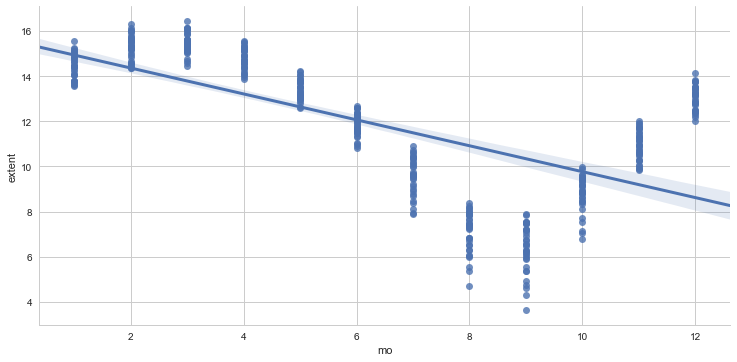

In [8]:
sns.lmplot('mo', 'extent', ice2, size = 5.2, aspect = 2);
plt.savefig("files/IceExtentCleanedByMonth.png", dpi = 300, bbox_inches = 'tight')

This plot reveals that we need to normalize the data (it has a sinusoidal shape)  and to do this we need to compute the mean for each month and use this to normalize the data further.

In [9]:
# Compute the mean for each month. 
month_means = ice2.groupby('mo')['extent'].mean()
print (month_means)

mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64


Use the means calculated from the last step to normalize the data in preparation to build a linear regression model.

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Steve\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Steve\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


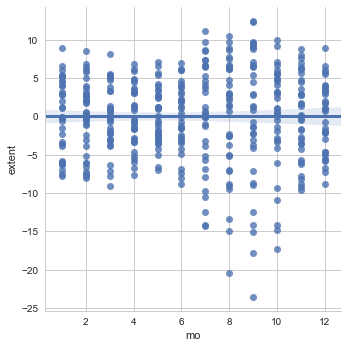

In [10]:
# Insert code here for data normalization using a for loop,
# the monthly mean calculated above and re-plot 
for i in range (12):
    ice2.extent[ ice2.mo == i+1] =100*(ice2.extent[ ice2.mo == i+1]- month_means[i +1])/month_means.mean()
sns.lmplot("mo", "extent", ice2)

Checkpoint 2 you should now have the following results after cleaning and normalizing <br>
mean: -6.44876463972e-15 <br>
var: 31.983239775 <br>

Values can be plotted for the entire time series or for particular months. In the  figure below we show the  model fitting the extent of the data (scatterplot and trend line). Second plot is with aa 95% confidence band.

Run the code below to see the plot for the entire year based on clean and normalized data


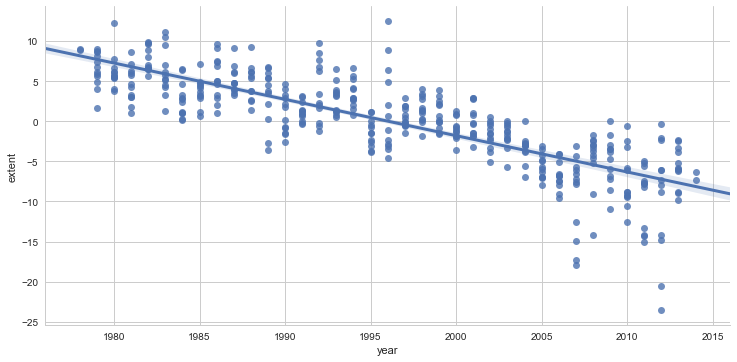

In [12]:
sns.lmplot("year", "extent", ice2,size = 5.2, aspect = 2);
plt.savefig("files/IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

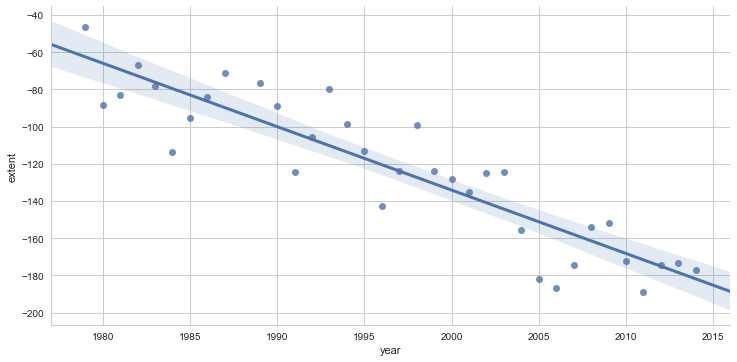

In [71]:
# Plot the same profile just for January 
ice2_jan = ice2[ice2.mo==1]
sns.lmplot("year", "extent", ice2_jan,size = 5.2, aspect = 2);

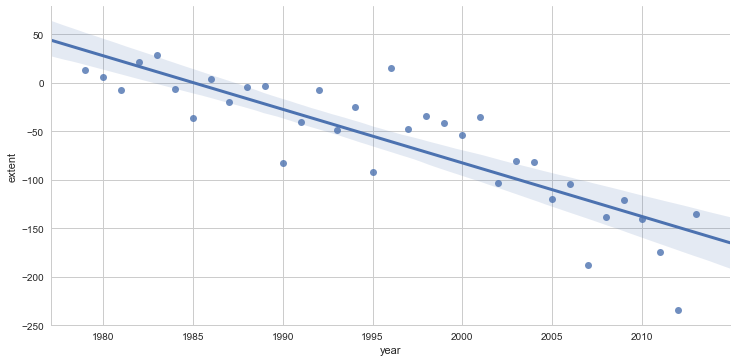

In [69]:
# Plot the same profile just for August 
ice2_aug = ice2[ice2.mo==8]
sns.lmplot("year", "extent", ice2_aug,size = 5.2, aspect = 2);

# Simple Linear regression

To compute the trend as a simple linear regression we use using Scikit-learn, library that provides a variety of both supervised and unsupervised machine learning techniques. 

sklearn.linearmodel.LinearRegression

Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. The Estimator.fit method sets the state of the estimator based on the training data.  

The  estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object. During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore (''). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a Estimator.predict method. In the case of regression, Estimator.predict will return the predicted regression values, $\hat{\textbf{y}}$. 


In [64]:
import statsmodels.api as sm
# Print out the statistics

X = ice2[['year']]  ## X usually means our input variables (or independent variables)
y = ice2[['extent']] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
 
  
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     466.1
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           4.32e-70
Time:                        16:09:28   Log-Likelihood:                -2128.6
No. Observations:                 422   AIC:                             4261.
Df Residuals:                     420   BIC:                             4269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7630.0439    358.041     21.311      0.000    6926.269    8333.819
year          -3.8727      0.179    -21.590      0.000      -4.225      -3.520
==============================================================================
Omnibus:                       20.058   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.567
Skew:                           0.532   Prob(JB):                     2.07e-05
Kurtosis:                       3.305   Cond. No.                     3.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line

So as number of observations. Df of residuals and models relates to the degrees of freedom 

It’s important to note that Statsmodels does not add a constant by default

Without a constant in our regression model we are forcing our model to go through the origin which normally leads to a poorer quality model.

Now lets use the sklearn module which is used for training and testing data to do the same linear regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

est = LinearRegression(fit_intercept = True)

x = ice2[['year']]
y = ice2[['extent']]

est.fit(x, y)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-3.87271679]]
Intercept: [ 7630.0439334]


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The ($R^2$) error measure compares the best model to a baseline model. The baseline model does not use any variables, and predicts the same outcome (dependent variable) irrespective of the values of the independent variable(s). As an example, the baseline model may predict the average value of the dependent variable over all the observations.

The best possible score for $R^2$ is 1.0: lower values are worse.

These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

Use sklear 

MSE: 1408.66910801
R^2: 0.0989831932239
var: extent    2979.150273
dtype: float64


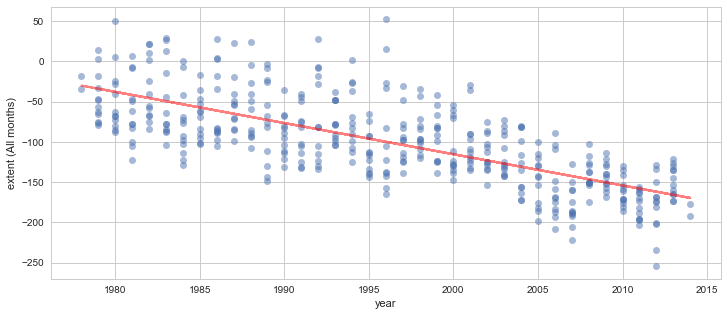

In [66]:
# Analysis for all months together.
x = ice2[['year']]
y = ice2[['extent']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())
plt.savefig("files/IceExtentLinearRegressionAllMonthsByYearPrediction.png", dpi = 300, bbox_inches = 'tight')

We can conclude that the data show a long-term negative trend in recent years. Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description
and presentation.
 


In [77]:
# Final Checkpoint 
# Can you estimate the extent of sea ice value for 2025 based on your model  
# insert code here 
x=2025
y_hat = model.predict(x)
y_hat

array([[-212.20756075]])

Week 6 Challenge Does our model suffer from multicollinearity issues?
Correlation is a measure of the linear relationship between variables. If two independent variables in our model are correlated, then the model likely suffers from multicollinearity issues. 

If the correlation coefficients output in the out table are  close to either +1 or to -1 for any set of two independent variables then you may have a multicollinerarity issue.

To check whether your model has such issues compute the correlation between all variables of ice2 data frame by using a Pearson correlation coefficient and the p-value for testing non-correlation. 

In [ ]:
# insert code here